Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 821 images belonging to 2 classes.
Found 350 images belonging to 2 classes.
Epoch 1/30
13/13 [==============================] - 60s 5s/step - loss: 0.7046 - accuracy: 0.5298 - val_loss: 0.7012 - val_accuracy: 0.4543
Epoch 2/30
13/13 [==============================] - 38s 3s/step - loss: 0.6892 - accuracy: 0.5201 - val_loss: 0.6882 - val_accuracy: 0.5457
Epoch 3/30
13/13 [==============================] - 37s 3s/step - loss: 0.6830 - accuracy: 0.5481 - val_loss: 0.6846 - val_accuracy: 0.5543
Epoch 4/30
13/13 [==============================] - 36s 3s/step - loss: 0.6847 - accuracy: 0.5737 - val_loss: 0.6831 - val_accuracy: 0.5629
Epoch 5/30
13/13 [==============================] - 36s 3s/step - loss: 0.6826 - accuracy: 0.5603 - val_loss: 0.6824 - val_accuracy: 0.5714
Epoch 6/30
13/13 [==============================] - 35s 3s/step - loss: 0.6813 - accuracy

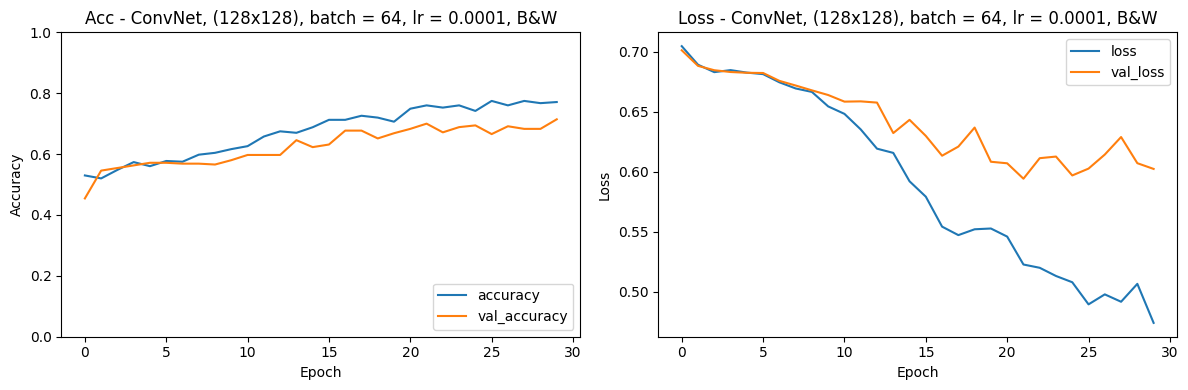

6/6 - 19s - loss: 0.6146 - accuracy: 0.6800 - 19s/epoch - 3s/step
Val accuracy: 0.6800000071525574


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

# Defina a semente para garantir a reprodutibilidade
tf.random.set_seed(42)

# Caminho para a pasta de dados
train_path = '/content/drive/MyDrive/Projeto Final/Dataset/BeWdata/train'

# Tamanho das imagens de entrada
input_size = (128, 128, 1)

# Set batch size
BATCH_SIZE = 64

# Por exemplo, você pode usar 20% dos dados para validação
# Normalização + aumento de dados
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    shear_range=0.4,
    rotation_range=15,
    vertical_flip=True,
    validation_split=0.3
)

# Normalização
val_datagen = ImageDataGenerator(rescale=1./255)

# Divida os dados de treinamento em treinamento e validação
train_data = train_datagen.flow_from_directory(
    train_path,
    target_size=input_size[:2],
    color_mode='grayscale',
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=True,  # Embaralhar os dados de treinamento
    subset='training',  # Especifica o conjunto de treinamento
    seed=42,  # Pode especificar uma semente para reprodução
)

val_data = train_datagen.flow_from_directory(
    train_path,
    target_size=input_size[:2],
    color_mode='grayscale',
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False,  # Não embaralhar os dados de validação
    subset='validation',  # Especifica o conjunto de validação
    seed=42  # Use a mesma semente para garantir a consistência
)

# Crie o modelo
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=input_size, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid', name='classification'))

epochs = 30
lr = 1e-4
# Compile o modelo
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=lr),
              metrics=['accuracy'])

# Treine o modelo
history = model.fit(
    train_data,
    validation_data=val_data,
    batch_size = BATCH_SIZE,
    epochs=epochs  # Você pode ajustar o número de épocas conforme necessário
)

# Plote as curvas de treinamento de precisão e perda
plt.figure(figsize=(12, 4))

# Gráfico de precisão
plt.subplot(1, 2, 1)
plt.title(f'Acc - ConvNet, (128x128), batch = {BATCH_SIZE}, lr = {lr}, B&W')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

# Gráfico de perda
plt.subplot(1, 2, 2)
plt.title(f'Loss - ConvNet, (128x128), batch = {BATCH_SIZE}, lr = {lr}, B&W')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Avalie o modelo nos dados de validação
val_loss, val_acc = model.evaluate(val_data, verbose=2)
print(f'Val accuracy: {val_acc}')

# Salve o modelo treinado
#model.save('/content/drive/MyDrive/Projeto Final/trained_model.h5')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 821 images belonging to 2 classes.
Found 350 images belonging to 2 classes.
Epoch 1/30
13/13 [==============================] - 38s 3s/step - loss: 0.6912 - accuracy: 0.5347 - val_loss: 0.6863 - val_accuracy: 0.5457
Epoch 2/30
13/13 [==============================] - 34s 3s/step - loss: 0.6845 - accuracy: 0.5481 - val_loss: 0.6840 - val_accuracy: 0.5543
Epoch 3/30
13/13 [==============================] - 34s 3s/step - loss: 0.6826 - accuracy: 0.5505 - val_loss: 0.6818 - val_accuracy: 0.5714
Epoch 4/30
13/13 [==============================] - 34s 3s/step - loss: 0.6780 - accuracy: 0.5822 - val_loss: 0.6801 - val_accuracy: 0.5714
Epoch 5/30
13/13 [==============================] - 36s 3s/step - loss: 0.6763 - accuracy: 0.5773 - val_loss: 0.6762 - val_accuracy: 0.5743
Epoch 6/30
13/13 [==============================] - 34s 3s/step - loss: 0.6772 - accuracy

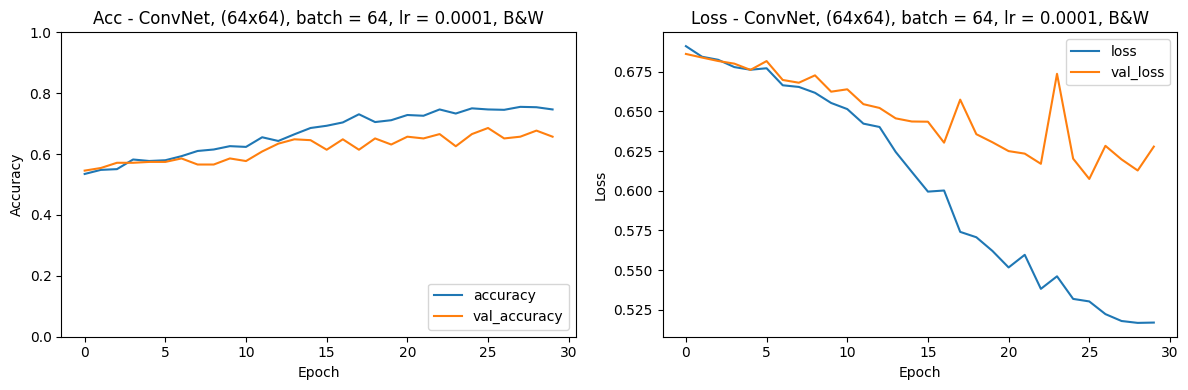

6/6 - 18s - loss: 0.6210 - accuracy: 0.6743 - 18s/epoch - 3s/step
Val accuracy: 0.6742857098579407


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

# Defina a semente para garantir a reprodutibilidade
tf.random.set_seed(42)

# Caminho para a pasta de dados
train_path = '/content/drive/MyDrive/Projeto Final/Dataset/BeWdata/train'

# Tamanho das imagens de entrada
input_size = (64, 64, 1)

# Set batch size
BATCH_SIZE = 64

# Por exemplo, você pode usar 20% dos dados para validação
# Normalização + aumento de dados
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    shear_range=0.4,
    rotation_range=15,
    vertical_flip=True,
    validation_split=0.3
)

# Normalização
val_datagen = ImageDataGenerator(rescale=1./255)

# Divida os dados de treinamento em treinamento e validação
train_data = train_datagen.flow_from_directory(
    train_path,
    target_size=input_size[:2],
    color_mode='grayscale',
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=True,  # Embaralhar os dados de treinamento
    subset='training',  # Especifica o conjunto de treinamento
    seed=42,  # Pode especificar uma semente para reprodução
)

val_data = train_datagen.flow_from_directory(
    train_path,
    target_size=input_size[:2],
    color_mode='grayscale',
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False,  # Não embaralhar os dados de validação
    subset='validation',  # Especifica o conjunto de validação
    seed=42  # Use a mesma semente para garantir a consistência
)

# Crie o modelo
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=input_size, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid', name='classification'))

epochs = 30
lr = 1e-4
# Compile o modelo
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=lr),
              metrics=['accuracy'])

# Treine o modelo
history = model.fit(
    train_data,
    validation_data=val_data,
    batch_size = BATCH_SIZE,
    epochs=epochs  # Você pode ajustar o número de épocas conforme necessário
)

# Plote as curvas de treinamento de precisão e perda
plt.figure(figsize=(12, 4))

# Gráfico de precisão
plt.subplot(1, 2, 1)
plt.title(f'Acc - ConvNet, (64x64), batch = {BATCH_SIZE}, lr = {lr}, B&W')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

# Gráfico de perda
plt.subplot(1, 2, 2)
plt.title(f'Loss - ConvNet, (64x64), batch = {BATCH_SIZE}, lr = {lr}, B&W')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Avalie o modelo nos dados de validação
val_loss, val_acc = model.evaluate(val_data, verbose=2)
print(f'Val accuracy: {val_acc}')

# Salve o modelo treinado
#model.save('/content/drive/MyDrive/Projeto Final/trained_model.h5')